In [62]:
!pip3 install pandas numpy matplotlib seaborn
!pip3 install kaggle


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("country_vaccinations.csv", parse_dates=["date"])
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [17]:
df.shape

(86512, 15)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   43607 non-null  float64       
 4   people_vaccinated                    41294 non-null  float64       
 5   people_fully_vaccinated              38802 non-null  float64       
 6   daily_vaccinations_raw               35362 non-null  float64       
 7   daily_vaccinations                   86213 non-null  float64       
 8   total_vaccinations_per_hundred       43607 non-null  float64       
 9   people_vaccinated_per_hundred        41294 non-null  float64       
 10  people_ful

In [20]:
df.describe

<bound method NDFrame.describe of            country iso_code       date  total_vaccinations  people_vaccinated  \
0      Afghanistan      AFG 2021-02-22                 0.0                0.0   
1      Afghanistan      AFG 2021-02-23                 NaN                NaN   
2      Afghanistan      AFG 2021-02-24                 NaN                NaN   
3      Afghanistan      AFG 2021-02-25                 NaN                NaN   
4      Afghanistan      AFG 2021-02-26                 NaN                NaN   
...            ...      ...        ...                 ...                ...   
86507     Zimbabwe      ZWE 2022-03-25           8691642.0          4814582.0   
86508     Zimbabwe      ZWE 2022-03-26           8791728.0          4886242.0   
86509     Zimbabwe      ZWE 2022-03-27           8845039.0          4918147.0   
86510     Zimbabwe      ZWE 2022-03-28           8934360.0          4975433.0   
86511     Zimbabwe      ZWE 2022-03-29           9039729.0          5053114

In [22]:
df.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [24]:
df[["total_vaccinations" , "country", "date"]].head(10)

,total_vaccinations,country,date
0,0.0,Afghanistan,2021-02-22
1,NaN,Afghanistan,2021-02-23
2,NaN,Afghanistan,2021-02-24
3,NaN,Afghanistan,2021-02-25
4,NaN,Afghanistan,2021-02-26
5,NaN,Afghanistan,2021-02-27
6,8200.0,Afghanistan,2021-02-28
7,NaN,Afghanistan,2021-03-01
8,NaN,Afghanistan,2021-03-02
9,NaN,Afghanistan,2021-03-03


In [26]:
df = df.drop(columns=["source_name", "source_website"])

KeyError: "['source_name', 'source_website'] not found in axis"

In [31]:
df.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
dtype: int64

In [38]:
print(df[["date","daily_vaccinations"]])

            date  daily_vaccinations
0     2021-02-22                 0.0
1     2021-02-23              1367.0
2     2021-02-24              1367.0
3     2021-02-25              1367.0
4     2021-02-26              1367.0
...          ...                 ...
86507 2022-03-25             69579.0
86508 2022-03-26             83429.0
86509 2022-03-27             90629.0
86510 2022-03-28            100614.0
86511 2022-03-29            103751.0

[86512 rows x 2 columns]


In [34]:
df["daily_vaccinations"] = df["daily_vaccinations"].fillna(0)

In [39]:
print(df[["date","daily_vaccinations"]])

            date  daily_vaccinations
0     2021-02-22                 0.0
1     2021-02-23              1367.0
2     2021-02-24              1367.0
3     2021-02-25              1367.0
4     2021-02-26              1367.0
...          ...                 ...
86507 2022-03-25             69579.0
86508 2022-03-26             83429.0
86509 2022-03-27             90629.0
86510 2022-03-28            100614.0
86511 2022-03-29            103751.0

[86512 rows x 2 columns]


In [37]:
df.duplicated().sum()

np.int64(0)

In [42]:
global_var = df.groupby("date")["daily_vaccinations"].sum().cumsum()
print(global_var)

date
2020-12-02    0.000000e+00
2020-12-03    0.000000e+00
2020-12-04    0.000000e+00
2020-12-05    0.000000e+00
2020-12-06    0.000000e+00
                  ...     
2022-03-25    1.126379e+10
2022-03-26    1.127746e+10
2022-03-27    1.129122e+10
2022-03-28    1.130561e+10
2022-03-29    1.132024e+10
Name: daily_vaccinations, Length: 483, dtype: float64


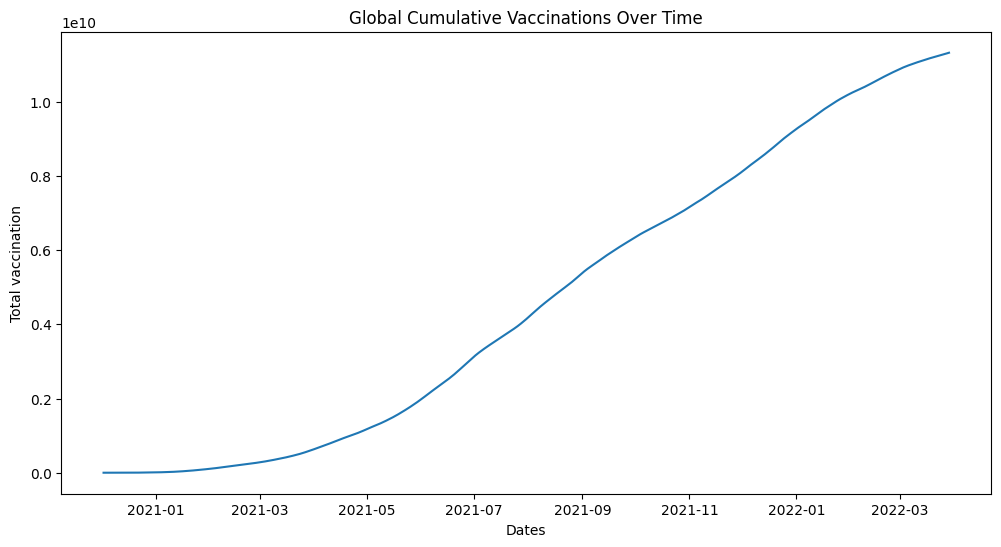

In [57]:
#Global vaccination trend
#How did the total number of COVID-19 vaccinations grow worldwide over time?
plt.figure(figsize=(12,6))
plt.plot(global_var.index, global_var.values)
plt.title("Global Cumulative Vaccinations Over Time")
plt.xlabel("Dates")
plt.ylabel("Total vaccination")
plt.show(block=True)

In [58]:
#Detect the single highest daily vaccination date
daily_global = df.groupby('date')['daily_vaccinations'].sum()
peak_date = daily_global.idxmax()
peak_value = daily_global.max()
print("Peak daily vaccinations:", peak_value, "on", peak_date.date())


Peak daily vaccinations: 43919121.0 on 2021-06-27


/var/folders/qt/s5bydp0d6xd8mvz2zvkydlpm0000gp/T/ipykernel_28712/4072786740.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_country.values,y = top_country.index, palette="viridis")


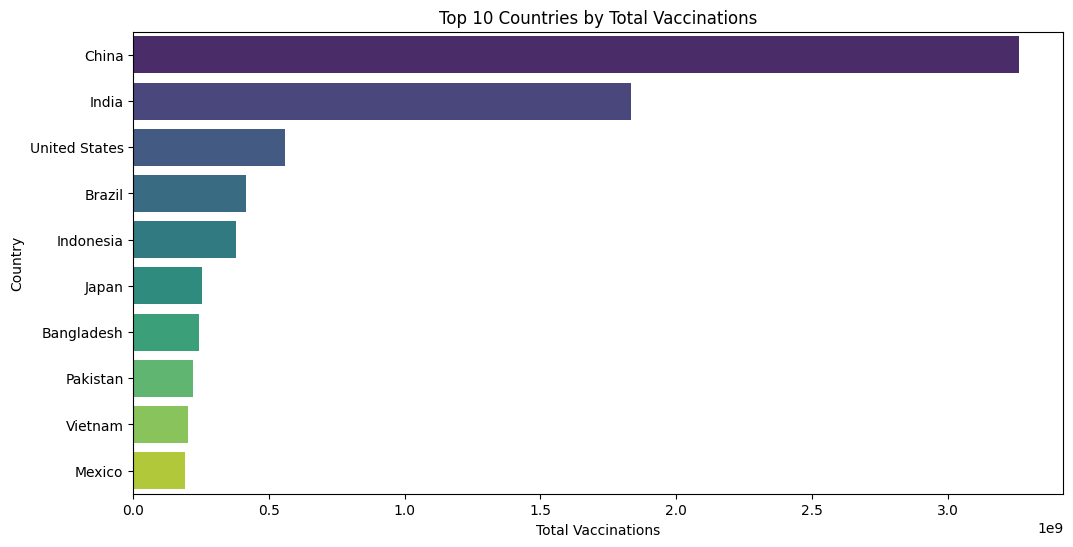

In [71]:
#Which countries vaccinated the most, and by how much?”

top_country = df.groupby("country")["total_vaccinations"].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
# print(sns.color_palette())
sns.barplot(x=top_country.values,y = top_country.index, palette="viridis")
plt.title("Top 10 Countries by Total Vaccinations")
plt.xlabel("Total Vaccinations")
plt.ylabel("Country")
plt.show()


# sns.barplot(
#     x=top_country.values,
#     y=top_country.index,
#     hue=top_country.index,        # assign color by country
#     dodge=False,                  # don’t split bars
#     palette="viridis",
#     legend=False                  # hide legend since y already labels them
# )


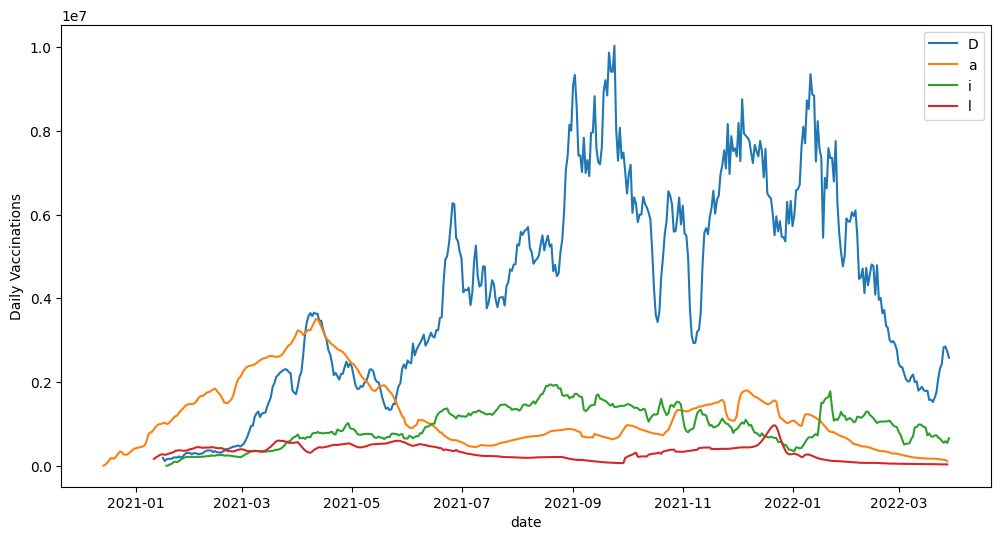

In [72]:
#Daily vaccination trends for selected countries

countries=["India","United States", "Brazil", "United Kingdom"]
plt.figure(figsize=(12,6))
for c in countries:
    subset = df[df["country"] == c]
    plt.plot(subset["date"], subset["daily_vaccinations"], label = c)
plt.legend("Daily Vaccinations in Selected Countries")
plt.xlabel("date")
plt.ylabel("Daily Vaccinations")
plt.show()

In [75]:
#exporting the cleaned dataset for dashboard creation

df.to_csv("clean_covid_vaccinations.csv", index=False)